In [57]:
# For Data Manipulation
import pandas as pd
import numpy as np

# For Data Visualisation
import sweetviz as sv
import matplotlib.pyplot as plt
import seaborn as sns

# Stats packages
import statsmodels.api as sm

# For Machine Learning
import category_encoders as ce
from sklearn.base import clone
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from skopt.space import Integer, Real, Categorical
from skopt.utils import use_named_args
from skopt import gp_minimize
from skopt.plots import plot_evaluations, plot_objective
from sklearn.model_selection import (
    StratifiedKFold,
    ShuffleSplit,
    KFold,
    cross_validate,
    cross_val_predict,
)
import lightgbm as lgb
from lightgbm import LGBMClassifier, early_stopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [33]:
df = pd.read_csv("Data\MockDataSet1_Cleaned.csv")
df

,QuoteRef,Channel,Product,Smoker,Joint?,Person1 Age,Term,TotalPremium,NBC,Sold,JF (Score),WGB (No. of other addresses held),X (Months same person on ER at current address),EF (No. of people not same surname at current address),NOB (Property group),URB (Income group),LSB (Regional banded house price band),BB (Number of CCJs),ND (Months since last CCJ)
0,QPCW-43,CTM,Level,1.0,1.0,38.0,20,36.22,1116.22,0.0,477.0,NaN,NaN,NaN,17.0,7.0,5.0,NaN,NaN
1,XXHO-52,CTM,Level accelerated,1.0,0.0,47.0,10,29.36,673.04,0.0,562.0,3.0,NaN,3.0,9.0,8.0,4.0,0.0,NaN
2,KTGM-13,Direct,Decreasing with CI,0.0,1.0,47.0,10,20.00,452.07,0.0,472.0,8.0,21.0,4.0,9.0,7.0,4.0,2.0,12.0
3,LKFU-15,MSM,Level with CI,1.0,0.0,37.0,5,20.00,452.07,0.0,472.0,8.0,21.0,4.0,9.0,7.0,4.0,2.0,12.0
4,OZIK-66,Direct,Level with CI,0.0,1.0,35.0,20,22.41,572.16,0.0,563.0,2.0,NaN,2.0,17.0,5.0,3.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2739,EQIE-29,CTM,Level accelerated,1.0,1.0,41.0,20,19.80,479.64,0.0,589.0,0.0,157.0,3.0,14.0,4.0,5.0,0.0,NaN
2740,GUZK-85,Direct,Level,1.0,1.0,41.0,5,17.07,477.05,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2741,ZEFY-74,CTM,Level accelerated,1.0,0.0,49.0,30,62.69,1878.51,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2742,HLVT-14,CTM,Level with CI,0.0,0.0,47.0,10,62.69,1878.51,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train.to_csv("Data\df_train_sold.csv", index=False)
df_test.to_csv("Data\df_test_sold.csv", index=False)

df_train

,QuoteRef,Channel,Product,Smoker,Joint?,Person1 Age,Term,TotalPremium,NBC,Sold,JF (Score),WGB (No. of other addresses held),X (Months same person on ER at current address),EF (No. of people not same surname at current address),NOB (Property group),URB (Income group),LSB (Regional banded house price band),BB (Number of CCJs),ND (Months since last CCJ)
2273,OAJY-27,MSM,Decreasing,0.0,1.0,46.0,30,14.48,287.99,0.0,577.0,1.0,NaN,8.0,7.0,3.0,7.0,0.0,NaN
1435,HWIQ-94,CTM,Level,1.0,1.0,48.0,20,34.46,935.38,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2229,OMVQ-73,MSM,Decreasing,1.0,1.0,49.0,20,32.39,781.61,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1609,BVGP-89,MSM,Decreasing with CI,0.0,0.0,32.0,30,46.11,1132.71,1.0,549.0,1.0,36.0,4.0,18.0,6.0,8.0,0.0,NaN
1860,HKJR-67,CTM,Decreasing,1.0,0.0,39.0,10,5.19,91.26,0.0,580.0,3.0,NaN,0.0,11.0,5.0,8.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,IAMY-41,MSM,Level,0.0,1.0,44.0,20,37.99,1164.15,1.0,556.0,0.0,18.0,7.0,12.0,5.0,6.0,0.0,NaN
1095,RYYC-11,Direct,Level,0.0,1.0,41.0,20,25.88,614.05,0.0,551.0,0.0,5.0,1.0,NaN,6.0,NaN,0.0,NaN
1130,JNQU-74,CTM,Decreasing with CI,0.0,0.0,54.0,30,19.46,396.68,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1294,XYQS-78,Direct,Level,0.0,0.0,53.0,30,18.35,596.22,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
print(len(df_train))
df_train["Sold"].value_counts(normalize=True)

2195


Sold
0.0    0.766287
1.0    0.233713
Name: proportion, dtype: float64

In [36]:
numeric_feats = [
    "Person1 Age",
    "Term",
    "TotalPremium",
    "WGB (No. of other addresses held)",
    "JF (Score)",
    "X (Months same person on ER at current address)",
    "EF (No. of people not same surname at current address)",
    "BB (Number of CCJs)",
    "ND (Months since last CCJ)",
    "NBC"
]

categorical_feats = [
    "Channel",
    "Product",
    "NOB (Property group)",
    "URB (Income group)",
    "LSB (Regional banded house price band)",
] 

binary_feats = [
    "Smoker",
    "Joint?",
]

target = ["Sold"]

all_feats = numeric_feats + categorical_feats + binary_feats
print(len(all_feats))
set(df_train.columns) - set(all_feats)

17


{'QuoteRef', 'Sold'}

In [37]:
sold_report = sv.analyze(df_train, target_feat="Sold")
sold_report.show_html("Data\Train_EDA_Sold.html")

                                             |          | [  0%]   00:00 -> (? left)

Report Data\Train_EDA_Sold.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [38]:
prep = ColumnTransformer(
    transformers = [
        ('pass', 'passthrough', numeric_feats + binary_feats),
        ('ordinal', ce.OrdinalEncoder(handle_missing="return_nan"), categorical_feats)
    ],
    remainder="drop",
    verbose_feature_names_out=False
).set_output(transform="pandas")

df_train_transformed = prep.fit_transform(df_train, df_train["Sold"])
df_train_transformed

,Person1 Age,Term,TotalPremium,WGB (No. of other addresses held),JF (Score),X (Months same person on ER at current address),EF (No. of people not same surname at current address),BB (Number of CCJs),ND (Months since last CCJ),NBC,Smoker,Joint?,Channel,Product,NOB (Property group),URB (Income group),LSB (Regional banded house price band)
2273,46.0,30,14.48,1.0,577.0,NaN,8.0,0.0,NaN,287.99,0.0,1.0,1.0,1.0,7.0,3.0,7.0
1435,48.0,20,34.46,NaN,NaN,NaN,NaN,NaN,NaN,935.38,1.0,1.0,2.0,2.0,NaN,NaN,NaN
2229,49.0,20,32.39,NaN,NaN,NaN,NaN,NaN,NaN,781.61,1.0,1.0,1.0,1.0,NaN,NaN,NaN
1609,32.0,30,46.11,1.0,549.0,36.0,4.0,0.0,NaN,1132.71,0.0,0.0,1.0,3.0,18.0,6.0,8.0
1860,39.0,10,5.19,3.0,580.0,NaN,0.0,0.0,NaN,91.26,1.0,0.0,2.0,1.0,11.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,44.0,20,37.99,0.0,556.0,18.0,7.0,0.0,NaN,1164.15,0.0,1.0,1.0,2.0,12.0,5.0,6.0
1095,41.0,20,25.88,0.0,551.0,5.0,1.0,0.0,NaN,614.05,0.0,1.0,3.0,2.0,NaN,6.0,NaN
1130,54.0,30,19.46,NaN,NaN,NaN,NaN,NaN,NaN,396.68,0.0,0.0,2.0,3.0,NaN,NaN,NaN
1294,53.0,30,18.35,NaN,NaN,NaN,NaN,NaN,NaN,596.22,0.0,0.0,3.0,2.0,NaN,NaN,NaN


In [39]:
# Initialise the model with random HPs
lgbm_model = LGBMClassifier(
    objective="binary",
    n_estimators=1000,
    learning_rate=0.1,
    max_depth=5,
    num_leaves=100,
    reg_alpha=0.1,
    reg_lambda=0.1,
    min_split_gain=0.01,
    ming_child_weight=0.1,
    subsample=1.0,
    colsample_bytree=1.0,
    cat_smooth=1.0,
    random_state=42,
    verbose=-1
)

# Define the pipeline
lgbm_pipe = Pipeline([
    ("prep", clone(prep)),
    ("model", clone(lgbm_model))
])

lgbm_pipe

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('pass', 'passthrough',
                                                  ['Person1 Age', 'Term',
                                                   'TotalPremium',
                                                   'WGB (No. of other '
                                                   'addresses held)',
                                                   'JF (Score)',
                                                   'X (Months same person on '
                                                   'ER at current address)',
                                                   'EF (No. of people not same '
                                                   'surname at current '
                                                   'address)',
                                                   'BB (Number of CCJs)',
                                                   'ND (Months since last CCJ)',
                                                   'NBC', 'Smoker', 'Joint?']),
                                                 ('ordinal',
                                                  OrdinalEncoder...urn_nan'),
                                                  ['Channel', 'Product',
                                                   'NOB (Property group)',
                                                   'URB (Income group)',
                                                   'LSB (Regional banded house '
                                                   'price band)'])],
                                   verbose_feature_names_out=False)),
                ('model',
                 LGBMClassifier(cat_smooth=1.0, max_depth=5,
                                min_split_gain=0.01, ming_child_weight=0.1,
                                n_estimators=1000, num_leaves=100,
                                objective='binary', random_state=42,
                                reg_alpha=0.1, reg_lambda=0.1, verbose=-1))])

In [40]:
# Define the fit params
fit_params = {"model__categorical_feature": categorical_feats}

# Look at all scoring metrics
scoring = ["neg_log_loss", "accuracy", "precision", "recall", "f1", "roc_auc"]

# Set the folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Since the pipeline drops the target, just pass df_train as it is
cv_results = cross_validate(
    clone(lgbm_pipe),
    df_train,
    df_train["Sold"],  # Target
    cv=kf,
    fit_params=fit_params,
    return_train_score=True,
    scoring=scoring
)

# Create a dictionary for the results
entry = {
    "model": "BaseModel",
    "neg_log_loss": np.mean(cv_results['test_neg_log_loss']),
    "accuracy": np.mean(cv_results['test_accuracy']),
    "precision": np.mean(cv_results['test_precision']),
    "recall": np.mean(cv_results['test_recall']),
    "f1": np.mean(cv_results['test_f1']),
    "roc_auc": np.mean(cv_results['test_roc_auc'])
}

# Convert to a DataFrame and output
results = pd.DataFrame([entry])
results

,model,neg_log_loss,accuracy,precision,recall,f1,roc_auc
0,BaseModel,-0.279677,0.904328,0.832599,0.738617,0.781558,0.927752


Not bad for a base model. Will now optimise to get better results.

### Bayesian Optimisation

In [41]:
# Initialse the shuffle splitter
ss = ShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Get the indices and check for overlap
cv_train_idx, cv_val_idx = next(ss.split(df_train))
df_train_cv = df_train.iloc[cv_train_idx]
df_val_cv = df_train.iloc[cv_val_idx]

assert len(set(df_train_cv.index) & set(df_val_cv.index)) == 0 

In [42]:
len(df_val_cv)

439

In [43]:
# Creating a validation set for the cross validation
prep_cv = clone(prep)
X_train_cv = prep_cv.fit_transform(df_train_cv)
X_val_cv = prep_cv.transform(df_val_cv) 

In [44]:
# Set the fit params
fit_params = {
    "model__eval_set": [(X_val_cv, df_val_cv["Sold"])],
    "model__categorical_feature": categorical_feats,
    "model__callbacks": [early_stopping(30)], # Included early stopping to prevent overfitting and save time
    "model__eval_metric": "neg_log_loss"
    }

In [45]:
# Defining the bayes space
bayes_space = [
    Integer(4, 12, name="max_depth"),                  
    Integer(50, 200, name="num_leaves"),                
    Real(0.05, 0.3, "log-uniform", name="learning_rate"),  
    Real(0.01, 1, "log-uniform", name="reg_alpha"),      
    Real(0.01, 1, "log-uniform", name="reg_lambda"),     
    Integer(10, 50, name="min_child_samples"),          
    Real(0.8, 1.0, name="subsample"),                  
    Real(0.8, 1.0, name="colsample_bytree"),            
    Real(0.05, 1.0, "log-uniform", name="min_child_weight"), 
]

# Initialise random HPs
cv_params = {
    "max_depth": 5,
    "num_leaves": 1000,
    "reg_alpha": 0.1,
    "reg_lambda": 0.1,
    "min_split_gain": 0.01,
    "min_child_weight": 0.1,  
    "subsample": 1.0,
    "colsample_bytree": 1.0,
    "cat_smooth": 1.0,
    "learning_rate": 0.1,
    "min_child_samples": 20,  
    "random_state": 42,
    "verbose": -1 
}

In [46]:
# Additonal the early stopping data
early_stopping_data = []

@use_named_args(bayes_space)
def objective(**params):
    global early_stopping_data

    print(f"Evaluating params: {params}")
    cv_params_i = cv_params.copy()
    for key, value in params.items():
        cv_params_i[key] = value

    # Set the parameters
    lgbm_pipe['model'].set_params(**cv_params_i)

    # Run the cross validation
    lgbm_cv_results = cross_validate(
        lgbm_pipe,
        df_train_cv,
        df_train_cv["Sold"],
        cv=kf,
        fit_params=fit_params,
        return_estimator=True,
        return_train_score=True,
        scoring='neg_log_loss',
        error_score='raise'  
    )

    # Select the models from each cross validation
    cv_models = [estimator['model'] for estimator in lgbm_cv_results['estimator']]
    
    # Collect best_iteration_ from each model
    best_iterations = [model.best_iteration_ for model in cv_models]

    # Append the median best_iteration_ to the global list
    median_best_iteration = int(np.median(best_iterations))
    early_stopping_data.append(median_best_iteration)

    metric_to_min = -np.mean(lgbm_cv_results['test_score'])
    print(f"Mean Score: {metric_to_min}")
    return metric_to_min

In [47]:
# Ignore numpy warnings about extreme values
np.seterr(all='ignore')

# Run the optimisation
res_gp = gp_minimize(
    objective,
    bayes_space,
    n_initial_points=30,
    n_calls=100,
    verbose=False
)

Evaluating params: {'max_depth': 8, 'num_leaves': 199, 'learning_rate': 0.08169989298302885, 'reg_alpha': 0.5202209903600875, 'reg_lambda': 0.11629435569863217, 'min_child_samples': 35, 'subsample': 0.858097332161562, 'colsample_bytree': 0.8176402223822593, 'min_child_weight': 0.14110612327701832}
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[231]	valid_0's binary_logloss: 0.25091
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[231]	valid_0's binary_logloss: 0.237293
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[229]	valid_0's binary_logloss: 0.24701
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[229]	valid_0's binary_logloss: 0.258263
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[272]	valid_0's binary_logloss: 0.257549
Mean Score: 0.3106

In [48]:
# Find the index of the best iteration based on the minimum function value
bayes_best_iter = np.argmin(res_gp.func_vals)

# Retrieve the best early stopping iteration from the global list
best_iter_early_stopping = early_stopping_data[bayes_best_iter]

# Set the number of estimators for refitting the model
n_estimators_refit = best_iter_early_stopping
print(f"n_estimators for Refit: {n_estimators_refit}")

# Get the best score and hyperparameters from the Bayesian optimization results
bayes_best_score = res_gp.fun
bayes_best_hps = res_gp.x
bayes_best_score, bayes_best_hps

n_estimators for Refit: 217


(0.3012299655431246,
 [12,
  72,
  0.05,
  0.47756201080897015,
  0.021053216843057602,
  10,
  0.9473117222106733,
  0.8,
  0.4746669486648529])

In [49]:
# Get the best hyperparameters as a dictionary
bayes_best_params = {res_gp.space[i][1].name: res_gp.x[i] for i in range(len(res_gp.x))}
bayes_best_params

{'max_depth': 12,
 'num_leaves': 72,
 'learning_rate': 0.05,
 'reg_alpha': 0.47756201080897015,
 'reg_lambda': 0.021053216843057602,
 'min_child_samples': 10,
 'subsample': 0.9473117222106733,
 'colsample_bytree': 0.8,
 'min_child_weight': 0.4746669486648529}

In [50]:
# Update the best parameters with the number of estimators for refit
bayes_best_params.update({"n_estimators": n_estimators_refit})

# Define the LGBM model with the best parameters
lgbm_best_model = LGBMClassifier(**bayes_best_params)

# Fit the model on the entire training set
lgbm_best_model.fit(X_train_cv, df_train_cv["Sold"])

# Define the pipeline
lgbm_pipe_best = Pipeline([
    ("prep", clone(prep)),  
    ("model", clone(lgbm_best_model))
])

lgbm_pipe_best.fit(df_train, df_train["Sold"])

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('pass', 'passthrough',
                                                  ['Person1 Age', 'Term',
                                                   'TotalPremium',
                                                   'WGB (No. of other '
                                                   'addresses held)',
                                                   'JF (Score)',
                                                   'X (Months same person on '
                                                   'ER at current address)',
                                                   'EF (No. of people not same '
                                                   'surname at current '
                                                   'address)',
                                                   'BB (Number of CCJs)',
                                                   'ND (Months since last CCJ)',
                                                   'NBC', 'Smoker', 'Joint?']),
                                                 ('ordinal',
                                                  OrdinalEncoder...
                                                   'URB (Income group)',
                                                   'LSB (Regional banded house '
                                                   'price band)'])],
                                   verbose_feature_names_out=False)),
                ('model',
                 LGBMClassifier(colsample_bytree=0.8, learning_rate=0.05,
                                max_depth=12, min_child_samples=10,
                                min_child_weight=0.4746669486648529,
                                n_estimators=217, num_leaves=72,
                                reg_alpha=0.47756201080897015,
                                reg_lambda=0.021053216843057602,
                                subsample=0.9473117222106733))])

In [51]:
fit_params = {"model__categorical_feature": categorical_feats}
scoring = ["neg_log_loss", "accuracy", "precision", "recall", "f1", "roc_auc"]
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Since the pipeline drops the target, just pass df_train as it is
cv_results = cross_validate(
    clone(lgbm_pipe_best),
    df_train,
    df_train["Sold"],  # Target
    cv=kf,
    fit_params=fit_params,
    return_train_score=True,
    scoring=scoring
)

# Create a dictionary for the results
entry = {
    "model": "BayesOptLLModel",
    "neg_log_loss": np.mean(cv_results['test_neg_log_loss']),
    "accuracy": np.mean(cv_results['test_accuracy']),
    "precision": np.mean(cv_results['test_precision']),
    "recall": np.mean(cv_results['test_recall']),
    "f1": np.mean(cv_results['test_f1']),
    "roc_auc": np.mean(cv_results['test_roc_auc'])
}
entry = pd.DataFrame([entry])

# Concatenate the new entry to the results DataFrame
results = pd.concat([results, entry], ignore_index=True)
results

,model,neg_log_loss,accuracy,precision,recall,f1,roc_auc
0,BaseModel,-0.279677,0.904328,0.832599,0.738617,0.781558,0.927752
1,BayesOptLLModel,-0.257071,0.904784,0.858395,0.711969,0.774822,0.929749


### Interpretation and Evaluation

In [52]:
import shap
from sklearn.inspection import PartialDependenceDisplay
from sklearn.metrics import confusion_matrix



In [53]:
X_test = lgbm_pipe_best['prep'].transform(df_test)

explainer = shap.TreeExplainer(lgbm_pipe_best['model'])
shap_values = explainer.shap_values(X_test)

c:\Users\Store\anaconda3\Lib\site-packages\shap\explainers\_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


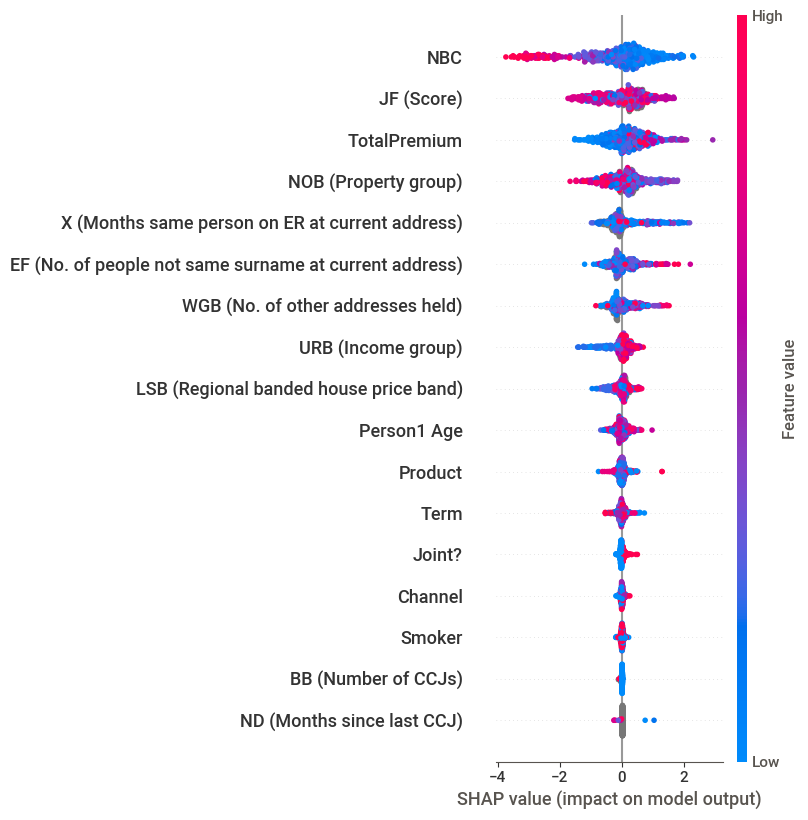

In [54]:
shap.summary_plot(shap_values, X_test)

c:\Users\Store\anaconda3\Lib\site-packages\matplotlib\axes\_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


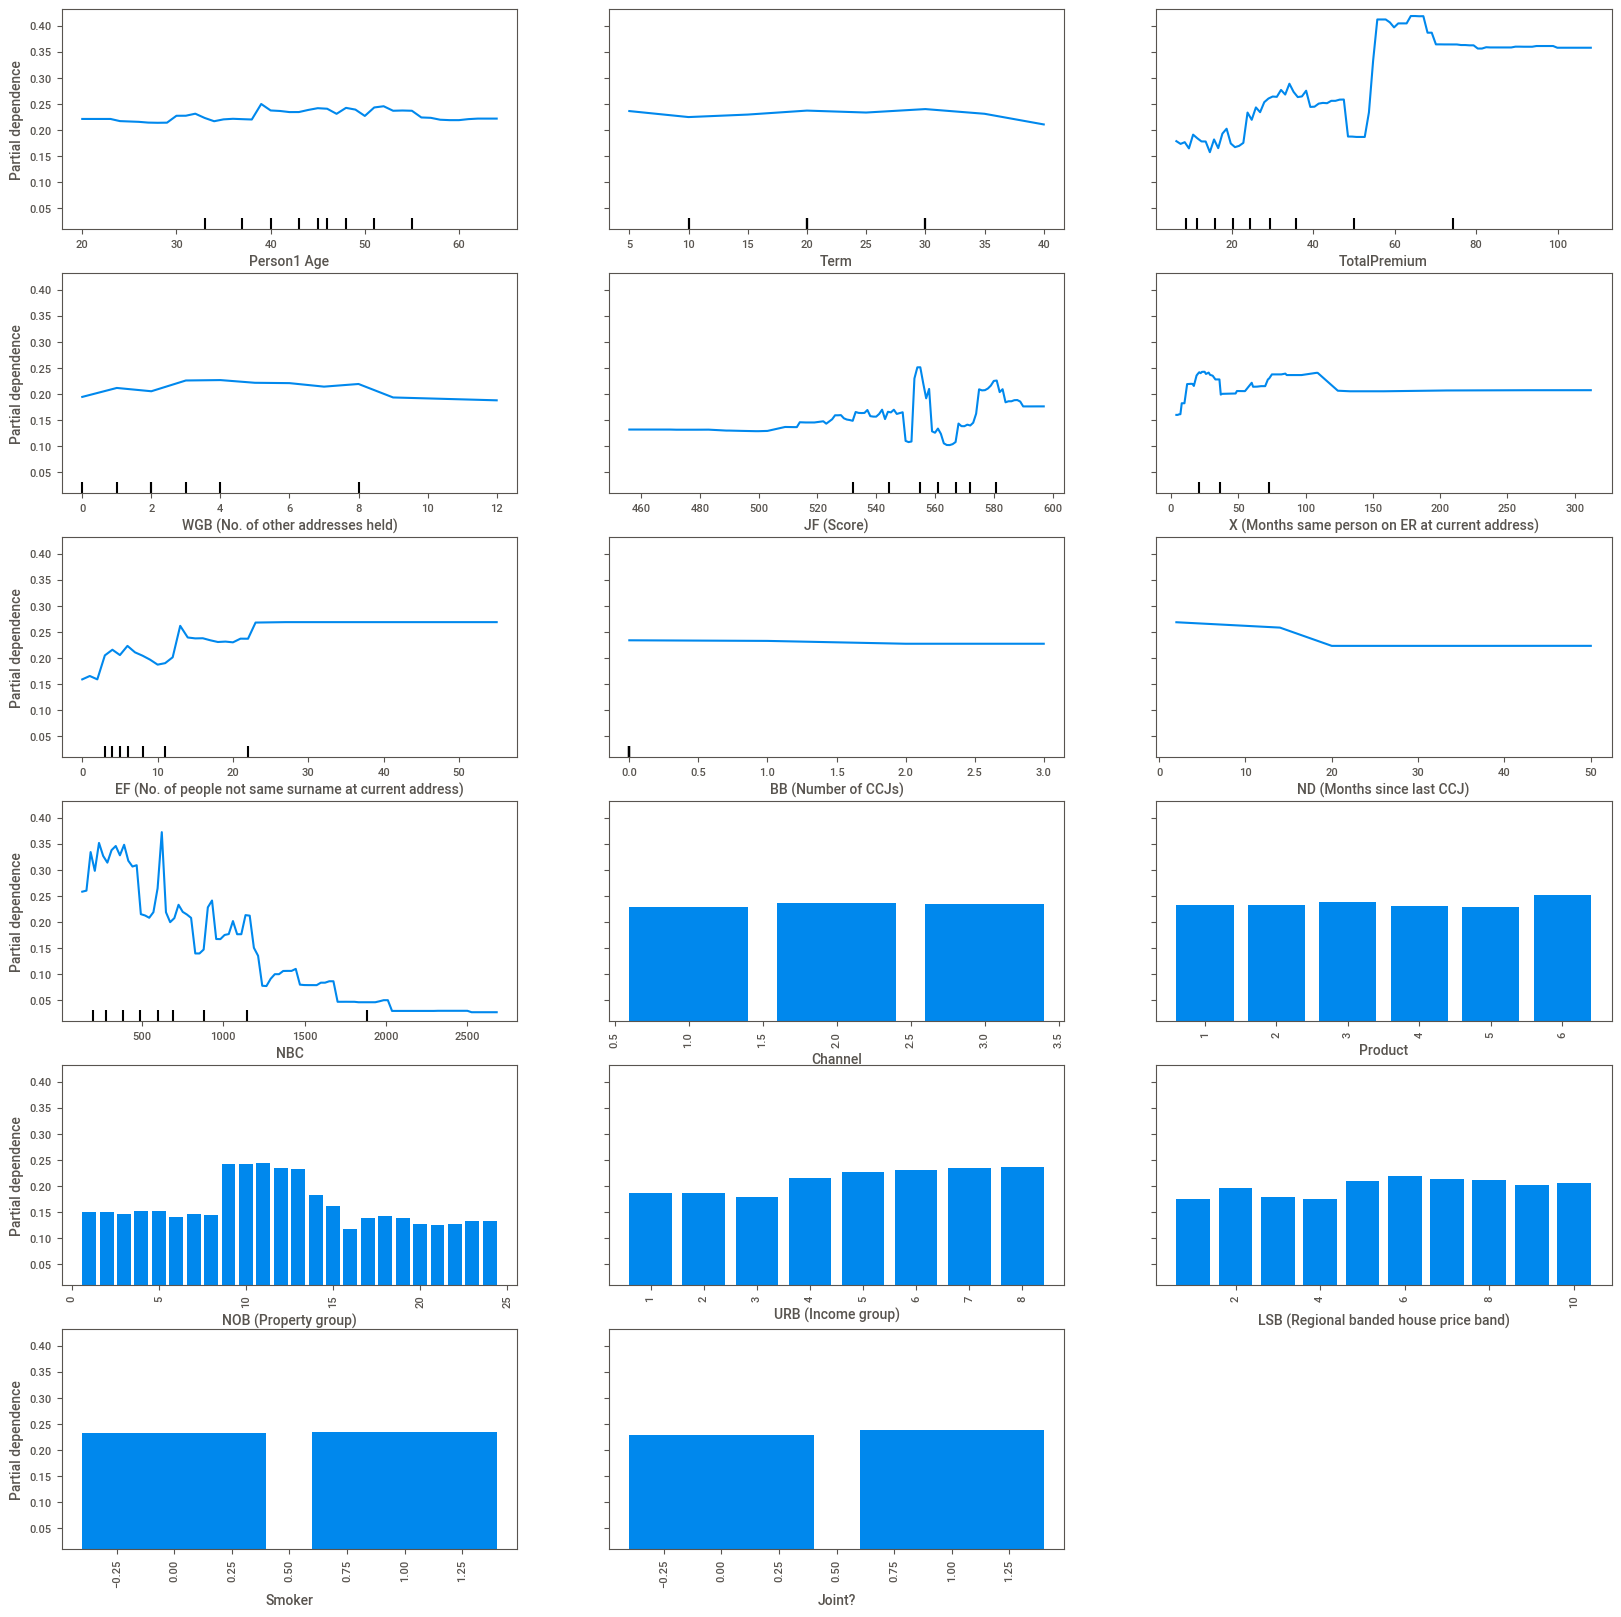

In [55]:

fig, ax = plt.subplots(figsize=(20, 20))
display = PartialDependenceDisplay.from_estimator(
    lgbm_pipe_best['model'], 
    X_test, 
    all_feats, 
    categorical_features=categorical_feats + binary_feats,
    ax=ax
)
plt.show()

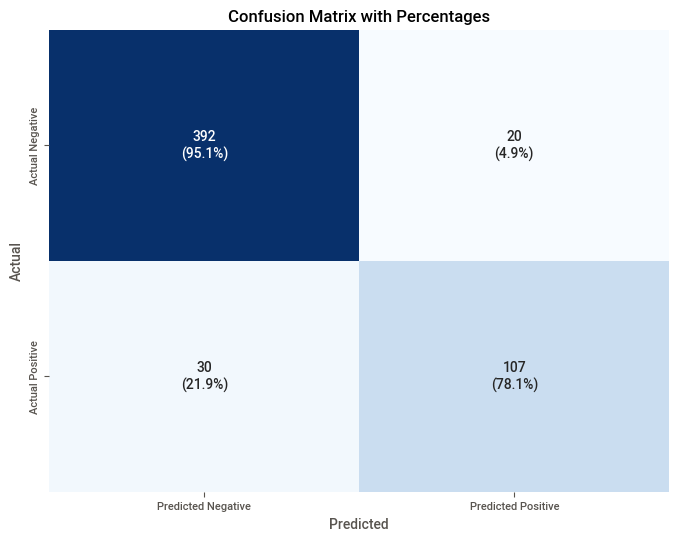

In [56]:
# Compute the confusion matrix
y_true = df_test["Sold"]
y_pred = lgbm_pipe_best.predict(df_test)
cm = confusion_matrix(y_true, y_pred)

# Compute percentages
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Create annotation labels with absolute values and percentages
cm_labels = np.array([[f'{value}\n({percent:.1f}%)' for value, percent in zip(row, percent_row)] 
                       for row, percent_row in zip(cm, cm_percent)])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=cm_labels, fmt='', cmap='Blues', cbar=False, 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix with Percentages')

# Show the plot
plt.show()

In [58]:
y_test_true = df_test["Sold"]
y_test_pred = lgbm_pipe_best.predict(df_test)

accuracy = accuracy_score(y_test_true, y_test_pred)
print(f"Accuracy on the test set: {accuracy:.2f}")

Accuracy on the test set: 0.91
